In [1]:
import os
import numpy as np

In [2]:
path_to_series = os.path.join(".", "datasets", "ecg-heartbeat-av.csv")
f = open(path_to_series)
series = np.array(f.readlines(), dtype=np.double)

In [3]:
# z-normalize time series
series = (series - np.mean(series, axis=0)) / np.std(series, axis=0)

# Parameter rho determines the 'strictness' of the algorithm  
#   - higher -> more strict (more similarity in discovered motif sets)
#   - lower  -> less strict (less similarity in discovered motif sets) 
rho = 0.55

# Number of motifs to be found
nb_motifs = 2

fs = 128  # sampling frequency
# Heartbeats last 0.6s - 1s (equivalent to 60-100 bpm)
l_min = int(0.6 * fs)
l_max = int(  1 * fs)

# This parameter determines how much the motifs may overlap (intra and inter motif set)
overlap = 0.25

In [4]:
import locomotif.locomotif as locomotif
motif_sets = locomotif.apply_locomotif(series, rho, l_min, l_max, nb_motifs, overlap=overlap)
print(motif_sets)

[[(1772, 1872), (1474, 1560), (2075, 2160), (1666, 1773), (1871, 1979), (1349, 1475), (2159, 2268), (2382, 2456), (2455, 2551), (1559, 1667), (1978, 2076), (1237, 1350), (2267, 2383), (2550, 2648), (2827, 2965), (2647, 2723), (2722, 2828)], [(614, 735), (486, 607), (742, 836), (358, 479), (230, 351), (102, 223), (0, 95)]]


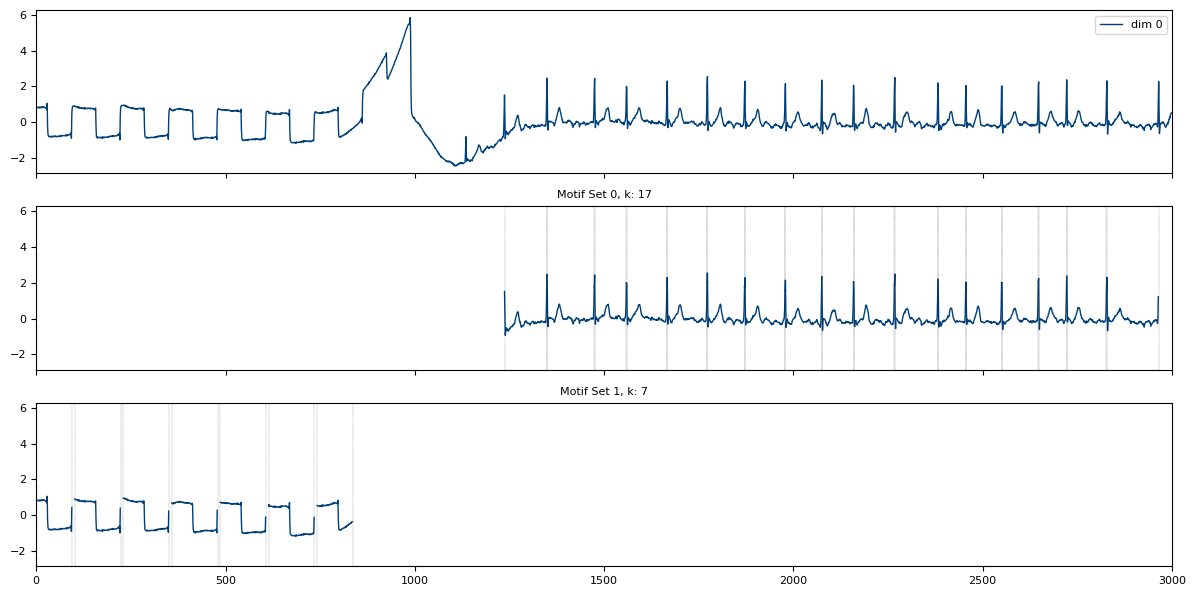

In [5]:
import locomotif.visualize as visualize
import matplotlib.pyplot as plt
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()

### Start and End Constraints

In [6]:
# start_mask specifies whether a motif can start at a certain time point (same for end_mask)
# for example: motifs can only start in the second half of the time series:
n = len(series)
start_mask = np.full(n, True)
start_mask[:n//2] = False

In [7]:
motif_sets = locomotif.apply_locomotif(series, rho, l_min, l_max, nb_motifs, overlap=overlap, start_mask=start_mask, end_mask=None)
print(motif_sets)

[[(1772, 1872), (1474, 1560), (2075, 2160), (1666, 1773), (1871, 1979), (1349, 1475), (2159, 2268), (2382, 2456), (2455, 2551), (1559, 1667), (1978, 2076), (1237, 1350), (2267, 2383), (2550, 2648), (2827, 2965), (2647, 2723), (2722, 2828)]]


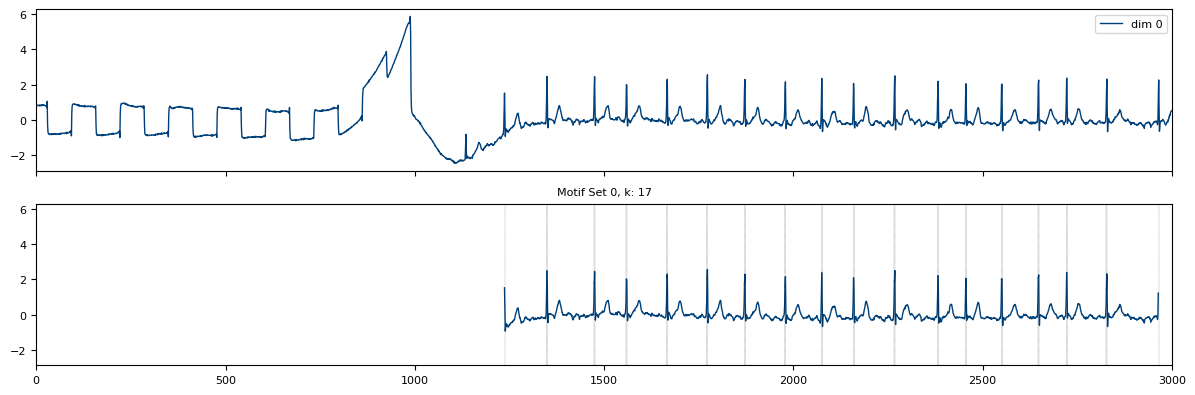

In [8]:
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()